#Installing dependencies / Libraries


In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, accuracy_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

#ML Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import lightgbm as lgb
from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
file_path = '/content/drive/My Drive/dataset/audio_dataset.xlsx'

#Reading data

In [4]:
data = pd.read_excel(file_path)

In [5]:
print(data.columns)
len(data.columns)

Index(['Label', 'File Size (KB)', 'Spectral Centroid Mean',
       'Spectral Bandwidth Mean', 'RMS Mean', 'Zero-Crossing Rate Mean',
       'Spectral Contrast Mean', 'Pitch Mean', 'Pitch Confidence Mean',
       'Mel Spectrogram Mean', 'Mel Spectrogram Variance', 'Energy Mean',
       'Speech rate'],
      dtype='object')


13

#Normalizing data

In [6]:
X = data.drop(columns='Label')
y = data['Label']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df["Label"] = y

data = X_scaled_df

data.head()

,File Size (KB),Spectral Centroid Mean,Spectral Bandwidth Mean,RMS Mean,Zero-Crossing Rate Mean,Spectral Contrast Mean,Pitch Mean,Pitch Confidence Mean,Mel Spectrogram Mean,Mel Spectrogram Variance,Energy Mean,Speech rate,Label
0,-0.839561,-0.238607,0.190651,0.094357,0.069426,2.048901,-1.014785,-0.159249,-0.007532,-0.368099,0.094357,0.063196,F_AI
1,-0.856980,-0.065436,0.181196,0.788903,0.073463,2.334293,-1.608152,0.609294,1.221874,1.336845,0.788903,0.237610,F_AI
2,-0.758710,1.279133,0.654165,0.231637,1.366303,1.520763,-0.220824,0.132183,0.125154,-0.347519,0.231637,-2.720242,F_AI
3,-0.797851,0.783195,0.265936,0.971734,2.097872,1.626184,1.904922,0.616820,1.276433,0.921564,0.971734,0.660161,F_AI
4,-0.827832,-0.292962,0.160127,0.072248,-0.286749,1.777547,-0.572135,-0.316149,0.053390,0.146302,0.072248,0.063196,F_AI


In [7]:
cleaned_data = data.dropna()
data = cleaned_data
has_null = data.isnull().any().any()
print(has_null)

False


#Visualization of dataset & PCA


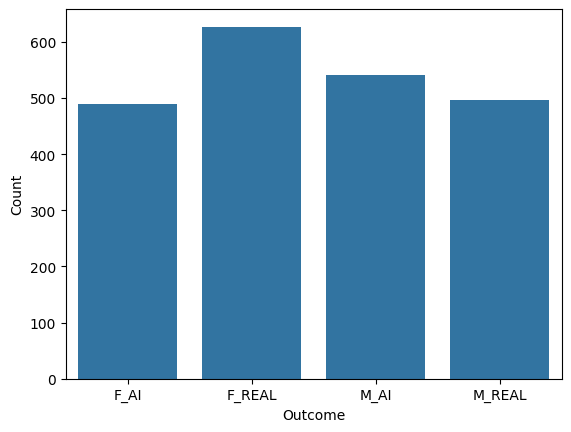

In [8]:
sns.countplot(data=data, x="Label")
plt.ylabel("Count")
plt.xlabel("Outcome")
plt.show()

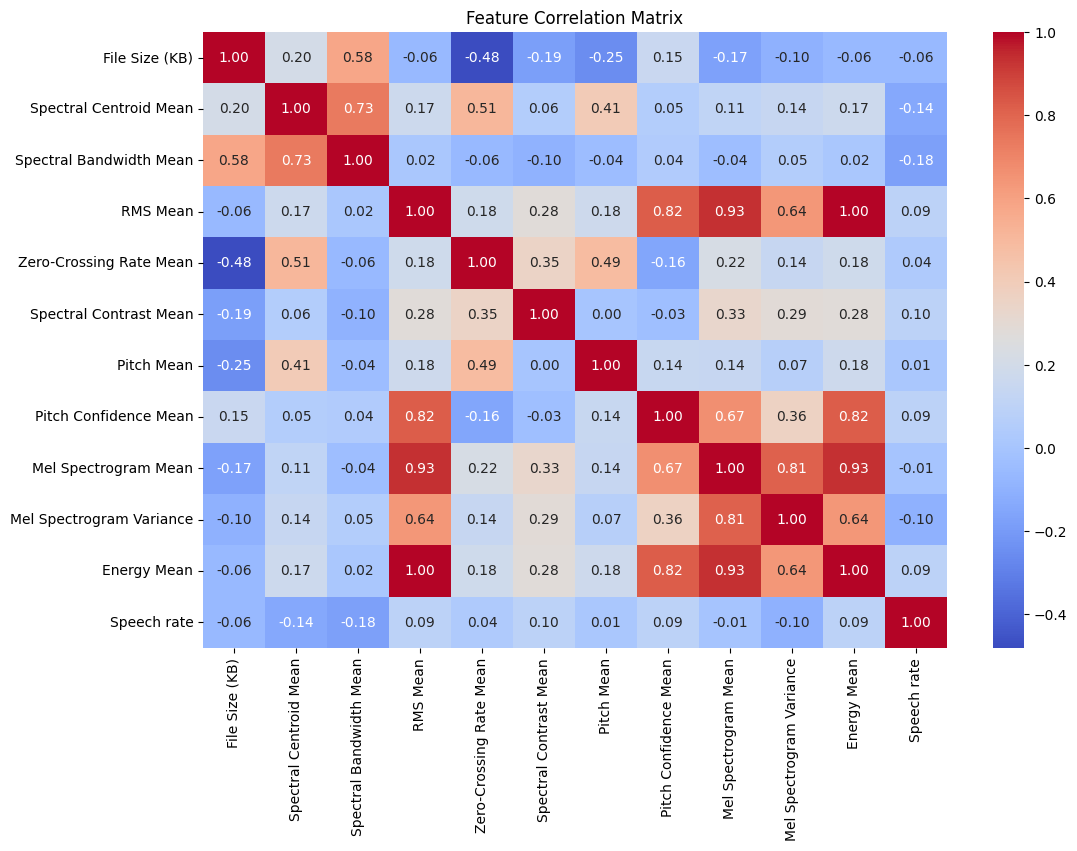

In [9]:
correlation = data.drop(columns='Label').corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

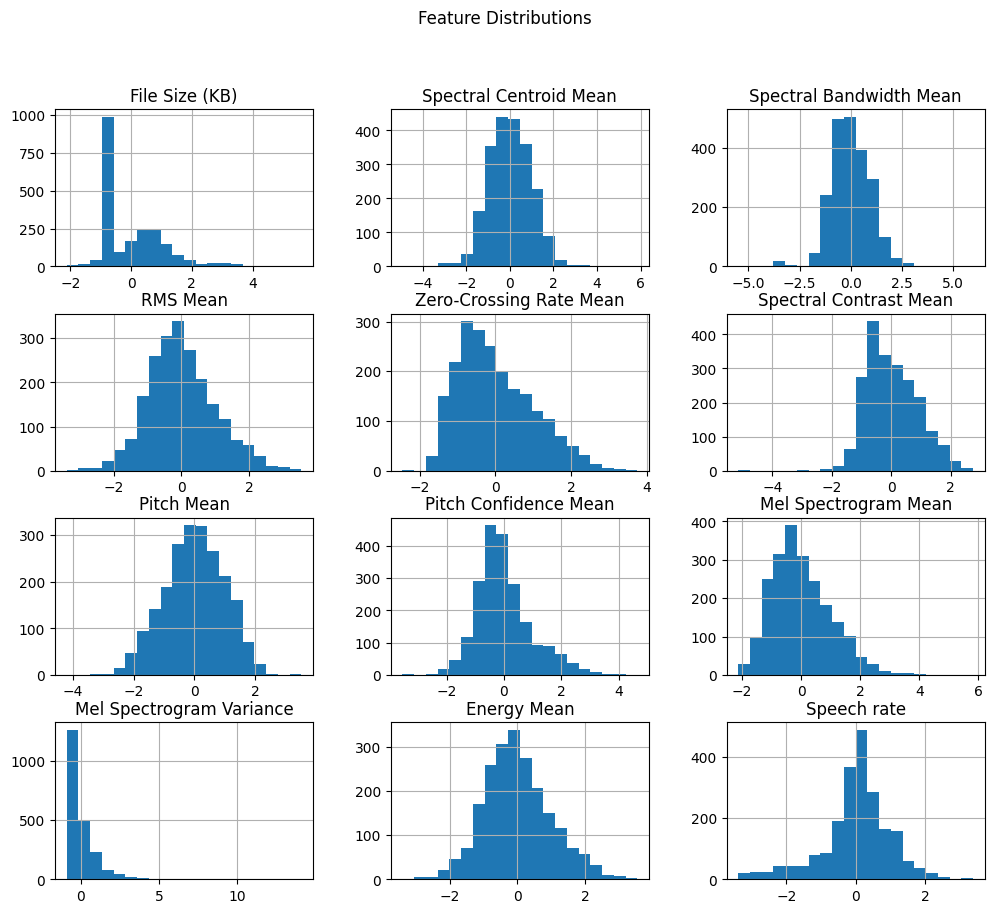

In [10]:
data.drop(columns='Label').hist(bins=20, figsize=(12, 10))
plt.suptitle("Feature Distributions")
plt.show()

Scree Plot


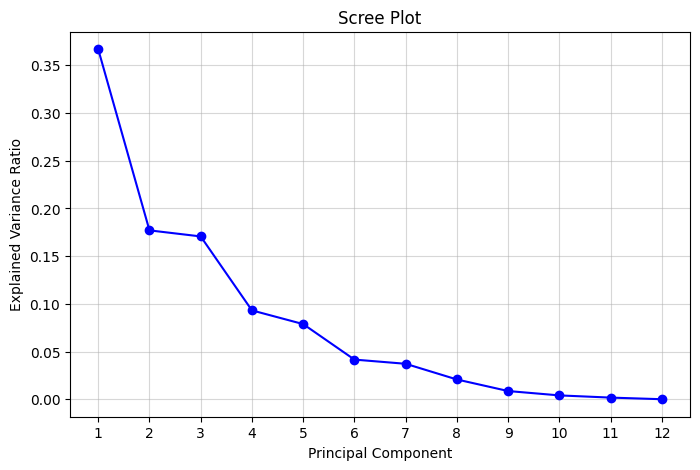


Cummulative Variance of each PC: - [0.3668515  0.54383875 0.71447174 0.8075838  0.88633803 0.92787898
 0.96501781 0.98571965 0.99429737 0.99830061 1.         1.        ]


In [11]:
X = data.drop(columns='Label') #features
pca = PCA()
X_pca = pca.fit_transform(X)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

#scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))  # Ensure PC indices are shown
plt.grid(alpha=0.5)
plt.show()

cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("\nCummulative Variance of each PC: -",cumulative_variance)


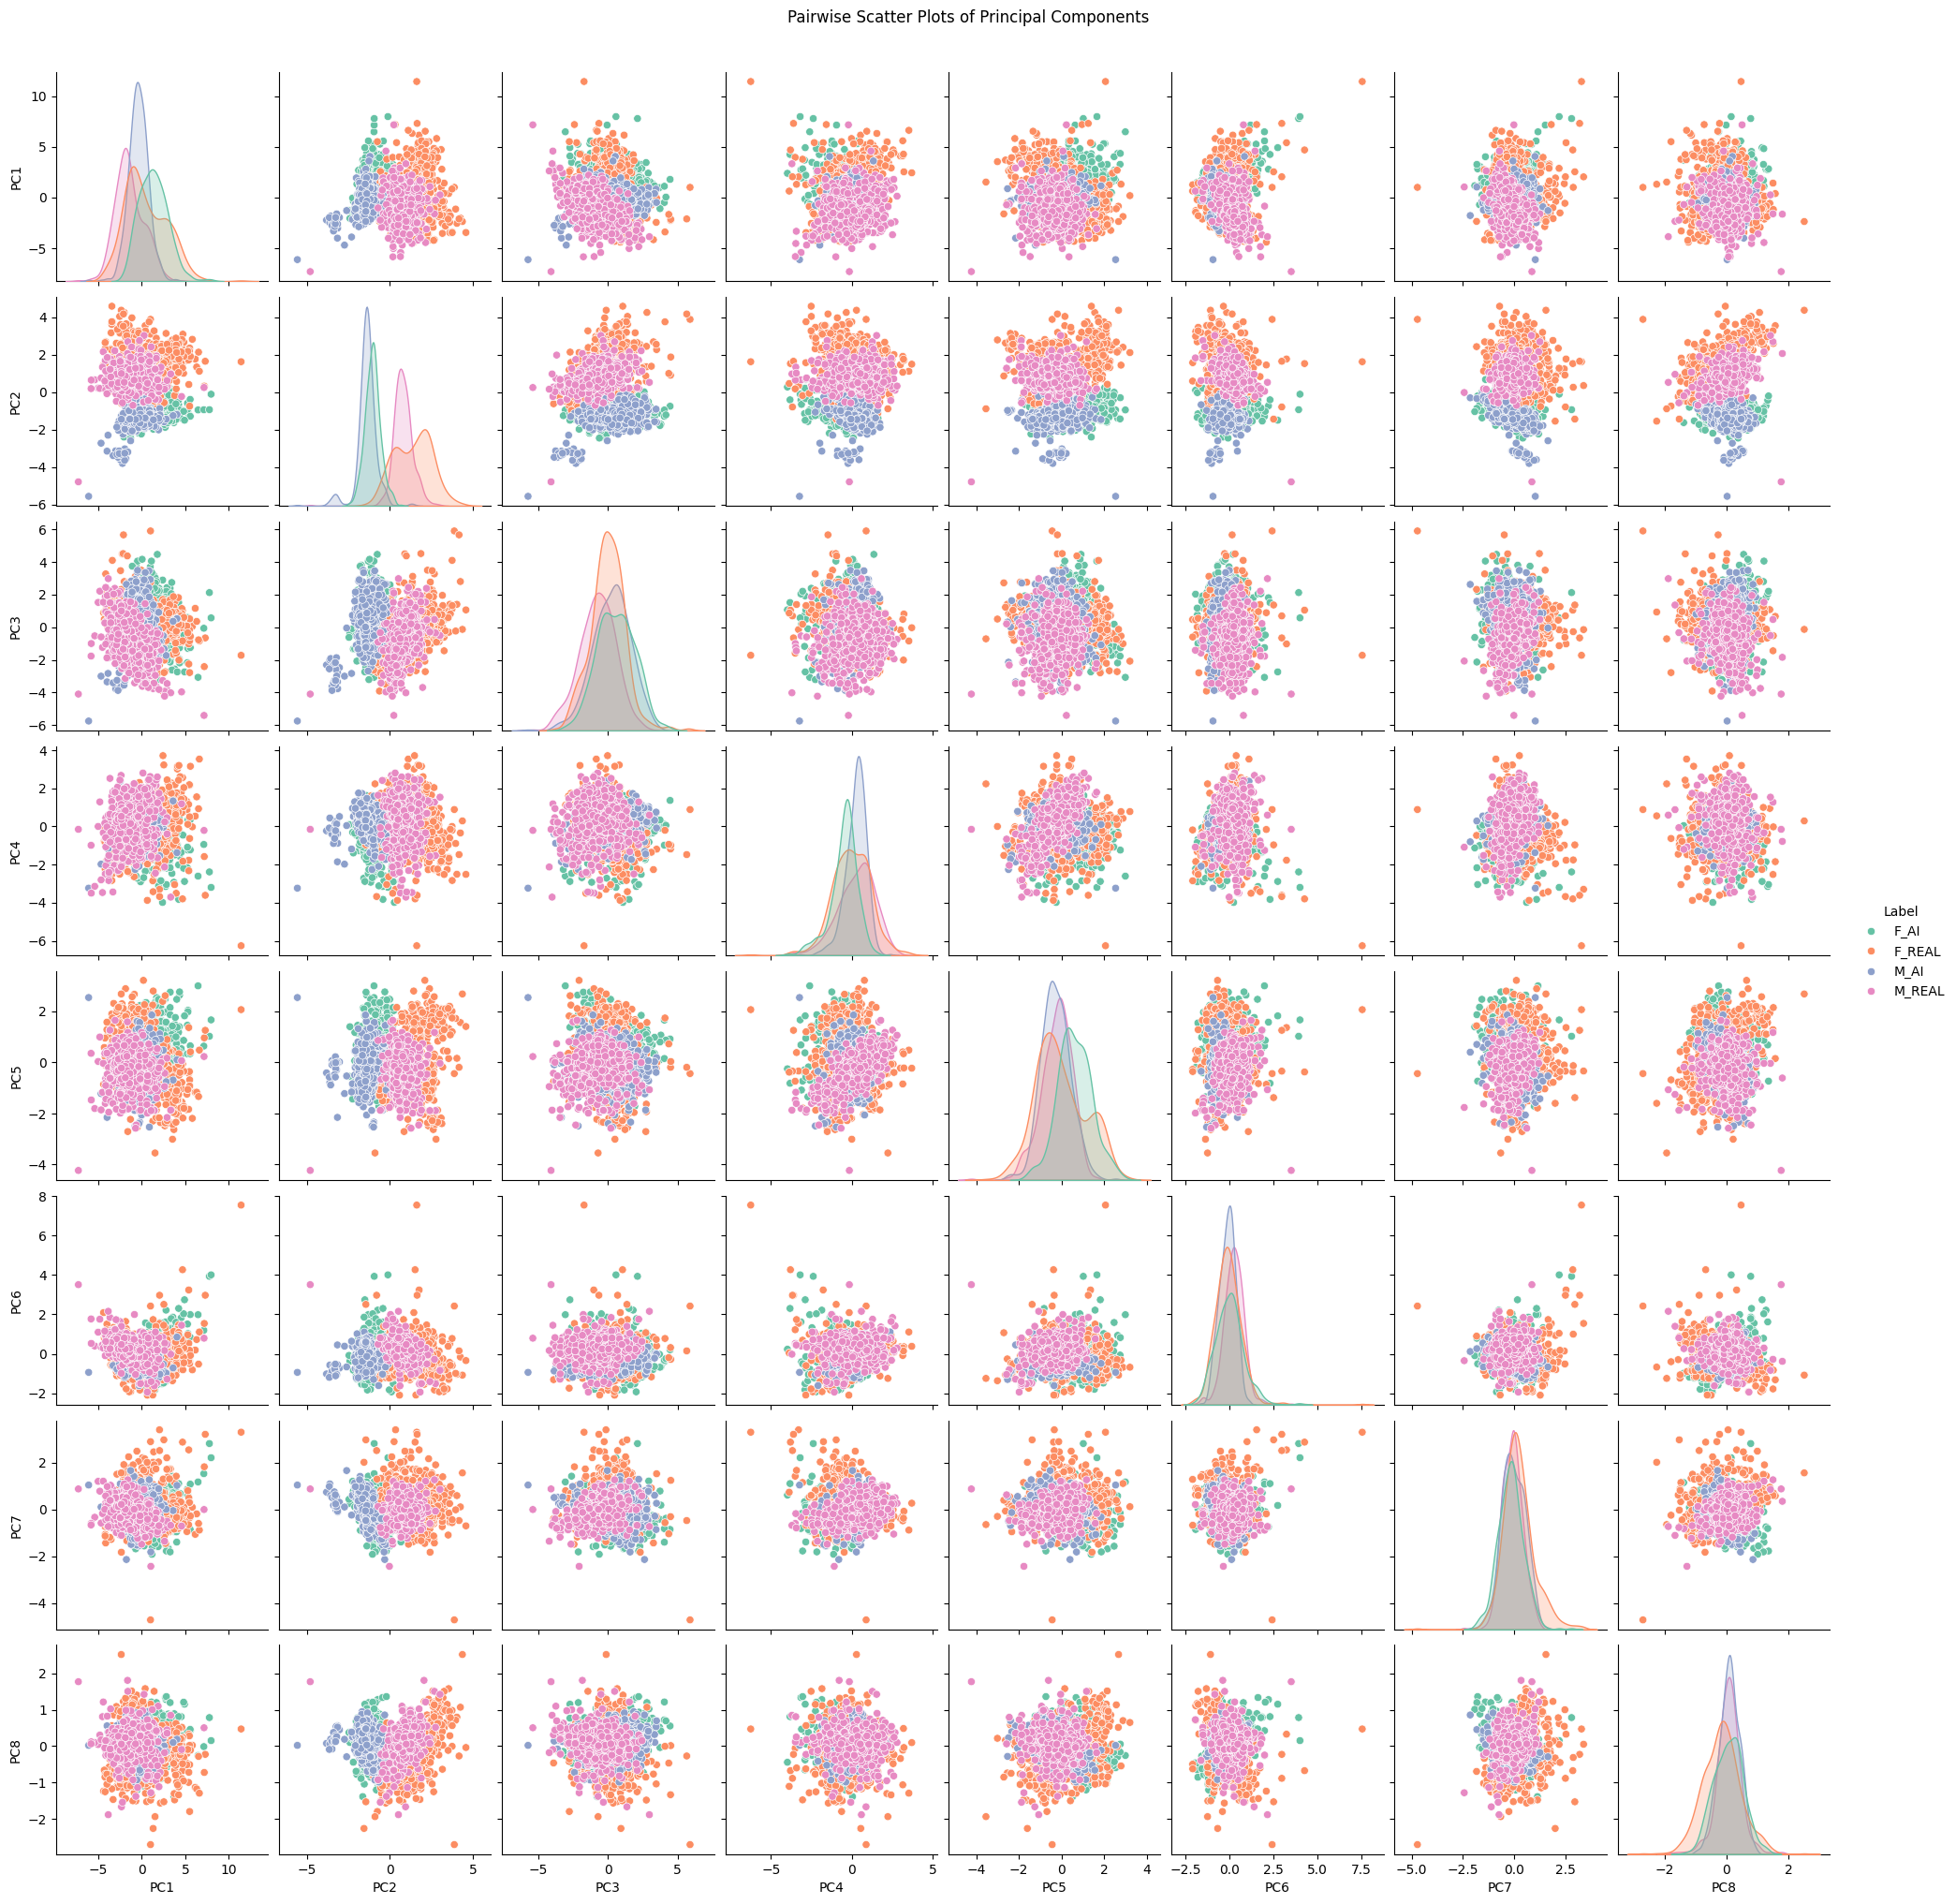

In [12]:
X = data.drop(columns='Label')  # Features
y = data['Label']  # Labels

pca = PCA(n_components=8)
X_pca = pca.fit_transform(X)

# Convert the PCA results into a DataFrame for easier visualization
data_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(8)])
data_pca['Label'] = y  # Add the label column back

# Pairplot to visualize pairwise combinations of PCs
sns.pairplot(data_pca, vars=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"], hue="Label", palette="Set2")
plt.suptitle("Pairwise Scatter Plots of Principal Components", y=1.02)
plt.show()

In [13]:
data_pca_cleaned = data_pca.dropna(axis=0, how='any')
data_pca = data_pca_cleaned
data_pca.isna().any().any()

False

#Data Split - Features and Labels

In [48]:
X = data_pca.iloc[:, :-1]  #features
y = data_pca["Label"]   #labels

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

splits = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

model_accuracies = {}

#Running data through ML models

#KNN

In [49]:
accuracies = []
for ratio in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=2)

    n_neighbors = len(X_train)

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Train-Test split ratio: {(1-ratio)*100:.1f}% - {ratio*100:.1f}%")
    print(f"Accuracy: {accuracy}")
    accuracies.append(accuracy)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["KNN"] = [avg_accuracy]

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.30697674418604654

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.00      0.00      0.00        43
      F_REAL       0.31      1.00      0.47        66
        M_AI       0.00      0.00      0.00        59
      M_REAL       0.00      0.00      0.00        47

    accuracy                           0.31       215
   macro avg       0.08      0.25      0.12       215
weighted avg       0.09      0.31      0.14       215

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.2744186046511628

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.00      0.00      0.00        92
      F_REAL       0.27      1.00      0.43       118
        M_AI       0.00      0.00      0.00       113
      M_REAL       0.00      0.00      0.00       107

    accuracy                           0.27       430
   macro avg       0.07      0.25      0.11       430


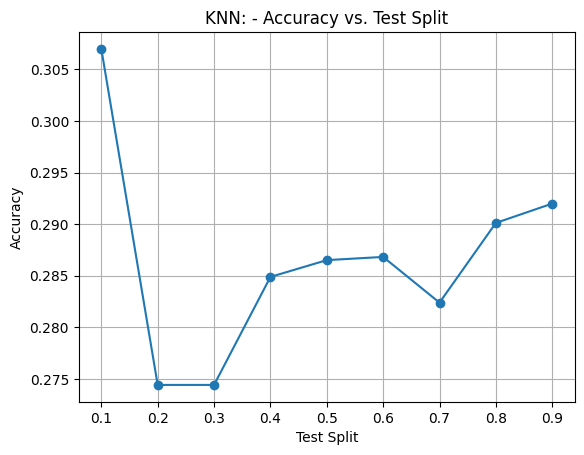

In [50]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('KNN: - Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#Gaussian Naive Bayes

In [51]:
accuracies = []
for test_split_ratio in splits:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_ratio, random_state=2)

  model = GaussianNB()
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
  print(f"Accuracy: {accuracy}")
  accuracies.append(accuracy)
  print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["Gausian NB"] = [avg_accuracy]

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.88      0.65      0.75        43
      F_REAL       0.87      0.71      0.78        66
        M_AI       0.79      0.90      0.84        59
      M_REAL       0.71      0.94      0.81        47

    accuracy                           0.80       215
   macro avg       0.81      0.80      0.79       215
weighted avg       0.81      0.80      0.80       215

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.7906976744186046

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.85      0.70      0.77        92
      F_REAL       0.81      0.72      0.76       118
        M_AI       0.77      0.88      0.82       113
      M_REAL       0.76      0.86      0.81       107

    accuracy                           0.79       430
   macro avg       0.80      0.79      0.79       430
weighted avg    

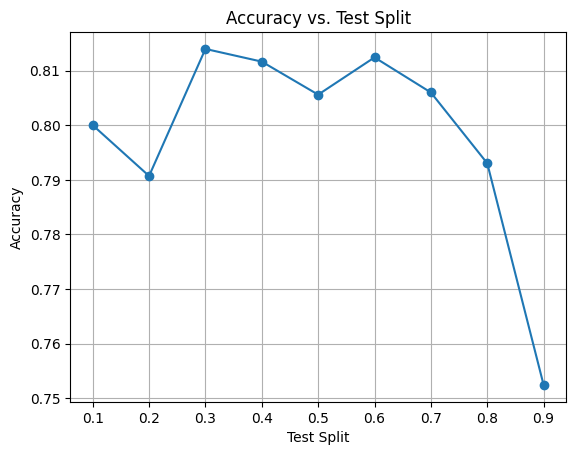

In [52]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#Bernoulli Naive Bayes

In [53]:
accuracies = []

for test_split_ratio in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_ratio, random_state=2)

    model = BernoulliNB()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
    print(f"Accuracy: {accuracy}")
    accuracies.append(accuracy)

    print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["Bernoulli NB"] = [avg_accuracy]

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.7069767441860465

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.64      0.79      0.71        43
      F_REAL       0.72      0.70      0.71        66
        M_AI       0.74      0.73      0.74        59
      M_REAL       0.72      0.62      0.67        47

    accuracy                           0.71       215
   macro avg       0.71      0.71      0.70       215
weighted avg       0.71      0.71      0.71       215

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.7255813953488373

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.68      0.76      0.72        92
      F_REAL       0.72      0.70      0.71       118
        M_AI       0.72      0.74      0.73       113
      M_REAL       0.79      0.70      0.74       107

    accuracy                           0.73       430
   macro avg       0.73      0.73      0.73       430
w

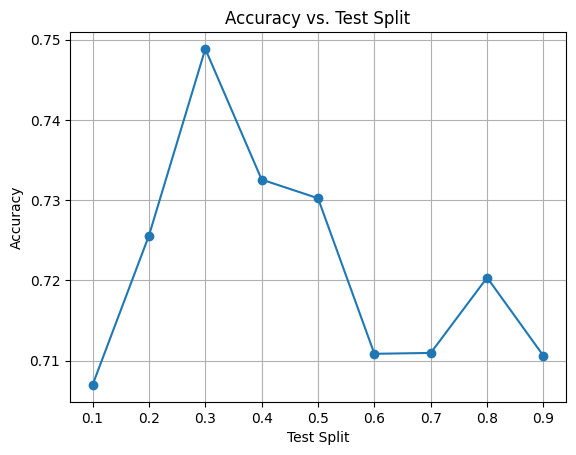

In [54]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#Logistic Regression

In [55]:
accuracies = []
for test_split_ratio in splits:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_ratio, random_state=2)

  logreg = LogisticRegression(random_state=16, max_iter=10000)

  # fit the model with data
  logreg.fit(X_train, y_train)

  y_pred = logreg.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
  print(f"Accuracy: {accuracy}")
  accuracies.append(accuracy)
  print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["LogReg"] = [avg_accuracy]

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.8093023255813954

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.76      0.72      0.74        43
      F_REAL       0.83      0.88      0.85        66
        M_AI       0.81      0.85      0.83        59
      M_REAL       0.83      0.74      0.79        47

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.8232558139534883

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.81      0.78      0.80        92
      F_REAL       0.82      0.82      0.82       118
        M_AI       0.82      0.88      0.85       113
      M_REAL       0.84      0.80      0.82       107

    accuracy                           0.82       430
   macro avg       0.82      0.82      0.82       430
w

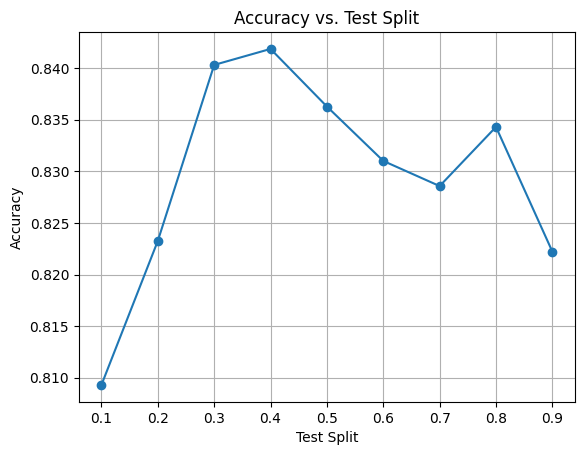

In [56]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#Linear Discriminant Analysis

In [57]:
accuracies = []

for test_split_ratio in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_ratio, random_state=2)

    model = LinearDiscriminantAnalysis()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
    print(f"Accuracy: {accuracy}")
    accuracies.append(accuracy)

    print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["Linear Discriminant"] = [avg_accuracy]

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.7581395348837209

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.73      0.70      0.71        43
      F_REAL       0.85      0.68      0.76        66
        M_AI       0.79      0.83      0.81        59
      M_REAL       0.66      0.83      0.74        47

    accuracy                           0.76       215
   macro avg       0.76      0.76      0.75       215
weighted avg       0.77      0.76      0.76       215

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.7883720930232558

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.82      0.77      0.79        92
      F_REAL       0.81      0.70      0.75       118
        M_AI       0.82      0.87      0.84       113
      M_REAL       0.72      0.81      0.77       107

    accuracy                           0.79       430
   macro avg       0.79      0.79      0.79       430
w

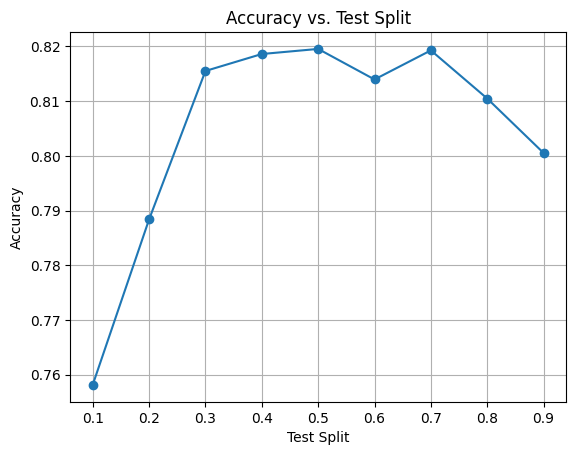

In [58]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#Random Forest

In [59]:
accuracies = []
for test_split_ratio in splits:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_ratio, random_state=2)

  model = RandomForestClassifier(n_estimators=100, random_state=42)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
  print(f"Accuracy: {accuracy}")
  accuracies.append(accuracy)
  print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["Random Forest"] = [avg_accuracy]

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.9116279069767442

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.80      0.84      0.82        43
      F_REAL       1.00      0.94      0.97        66
        M_AI       0.88      0.86      0.87        59
      M_REAL       0.94      1.00      0.97        47

    accuracy                           0.91       215
   macro avg       0.90      0.91      0.91       215
weighted avg       0.91      0.91      0.91       215

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.9069767441860465

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.83      0.91      0.87        92
      F_REAL       0.94      0.92      0.93       118
        M_AI       0.91      0.86      0.88       113
      M_REAL       0.94      0.94      0.94       107

    accuracy                           0.91       430
   macro avg       0.91      0.91      0.91       430
w

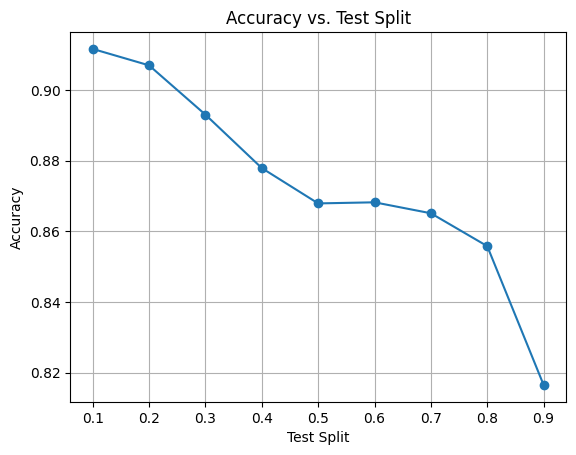

In [60]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#Decision Tree Classifier

In [61]:
accuracies = []

for test_split_ratio in splits:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_ratio, random_state=2)

  model = DecisionTreeClassifier(random_state=42)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
  print(f"Accuracy: {accuracy}")
  accuracies.append(accuracy)

  print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["Decision Trees"] = [avg_accuracy]

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.7953488372093023

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.65      0.74      0.70        43
      F_REAL       0.87      0.89      0.88        66
        M_AI       0.81      0.71      0.76        59
      M_REAL       0.83      0.81      0.82        47

    accuracy                           0.80       215
   macro avg       0.79      0.79      0.79       215
weighted avg       0.80      0.80      0.80       215

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.7976744186046512

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.68      0.79      0.73        92
      F_REAL       0.85      0.86      0.85       118
        M_AI       0.79      0.73      0.76       113
      M_REAL       0.88      0.81      0.84       107

    accuracy                           0.80       430
   macro avg       0.80      0.80      0.80       430
w

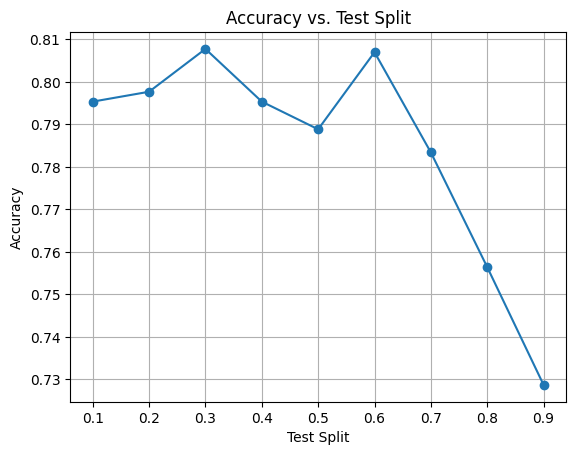

In [62]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#Gradient Boosting Classifier


In [63]:
accuracies = []

for test_split_ratio in splits:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_ratio, random_state=2)

  model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, random_state=42)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
  print(f"Accuracy: {accuracy}")
  accuracies.append(accuracy)

  print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["Gradient Boosting"] = [avg_accuracy]

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.8837209302325582

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.78      0.81      0.80        43
      F_REAL       0.97      0.92      0.95        66
        M_AI       0.85      0.85      0.85        59
      M_REAL       0.92      0.94      0.93        47

    accuracy                           0.88       215
   macro avg       0.88      0.88      0.88       215
weighted avg       0.89      0.88      0.88       215

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.9023255813953488

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.84      0.86      0.85        92
      F_REAL       0.93      0.93      0.93       118
        M_AI       0.88      0.88      0.88       113
      M_REAL       0.95      0.93      0.94       107

    accuracy                           0.90       430
   macro avg       0.90      0.90      0.90       430
w

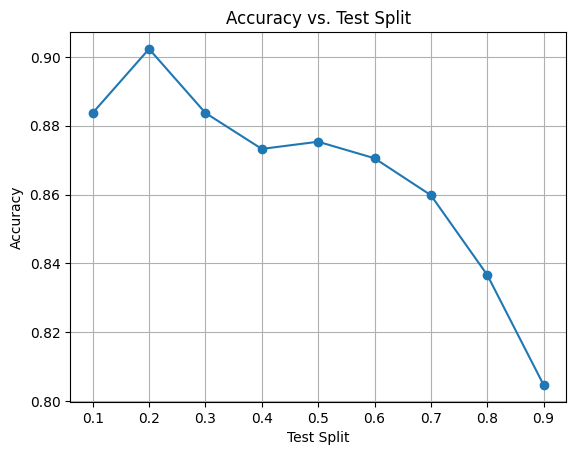

In [64]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#Extra Trees Classifier

In [65]:
accuracies = []

for test_split_ratio in splits:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_ratio, random_state=2)

  model = ExtraTreesClassifier(n_estimators=200, random_state=42)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
  print(f"Accuracy: {accuracy}")
  accuracies.append(accuracy)

  print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["Extra Trees"] = [avg_accuracy]

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.9302325581395349

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.84      0.86      0.85        43
      F_REAL       1.00      0.97      0.98        66
        M_AI       0.90      0.88      0.89        59
      M_REAL       0.96      1.00      0.98        47

    accuracy                           0.93       215
   macro avg       0.92      0.93      0.93       215
weighted avg       0.93      0.93      0.93       215

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.9209302325581395

Classification Report:
               precision    recall  f1-score   support

        F_AI       0.87      0.88      0.88        92
      F_REAL       0.97      0.94      0.95       118
        M_AI       0.89      0.89      0.89       113
      M_REAL       0.94      0.96      0.95       107

    accuracy                           0.92       430
   macro avg       0.92      0.92      0.92       430
w

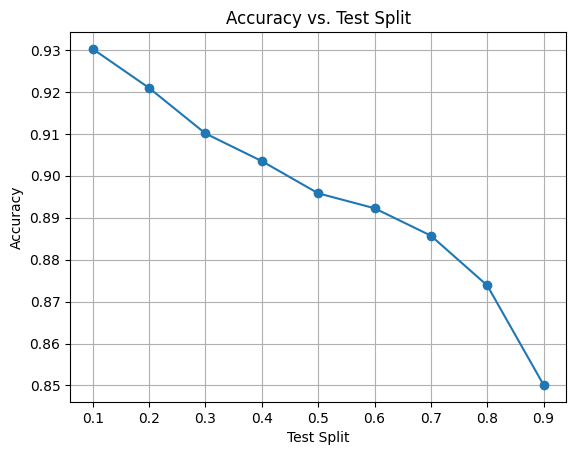

In [66]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#XGBClassifier

In [67]:
accuracies = []

for test_split_ratio in splits:
  X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=test_split_ratio, random_state=2)

  model = XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42, use_label_encoder=False)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
  print(f"Accuracy: {accuracy}")
  accuracies.append(accuracy)

  print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["XGB"] = [avg_accuracy]

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.9116279069767442

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84        43
           1       0.94      0.97      0.96        66
           2       0.93      0.85      0.88        59
           3       0.96      0.94      0.95        47

    accuracy                           0.91       215
   macro avg       0.91      0.91      0.91       215
weighted avg       0.91      0.91      0.91       215

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.9186046511627907

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        92
           1       0.94      0.93      0.94       118
           2       0.92      0.88      0.90       113
           3       0.95      0.93      0.94       107

    accuracy                           0.92       430
   macro avg       0.92      0.92      0.92       430
w

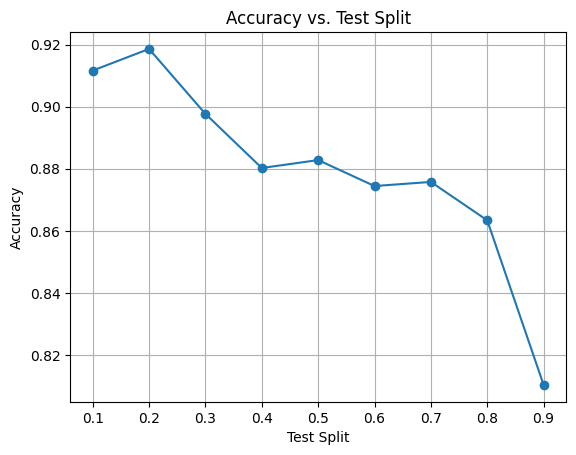

In [68]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#LightGBM Classifier


In [69]:
accuracies = []

for test_split_ratio in splits:
  X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=test_split_ratio, random_state=2)

  model = LGBMClassifier(n_estimators=200, learning_rate=0.1, random_state=42, verbosity=-1)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
  print(f"Accuracy: {accuracy}")
  accuracies.append(accuracy)

  print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["LightGBM"] = [avg_accuracy]

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.9162790697674419

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        43
           1       0.95      0.94      0.95        66
           2       0.91      0.90      0.91        59
           3       0.94      0.94      0.94        47

    accuracy                           0.92       215
   macro avg       0.91      0.91      0.91       215
weighted avg       0.92      0.92      0.92       215

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.9232558139534883

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90        92
           1       0.93      0.94      0.94       118
           2       0.91      0.91      0.91       113
           3       0.96      0.93      0.94       107

    accuracy                           0.92       430
   macro avg       0.92      0.92      0.92       430
w

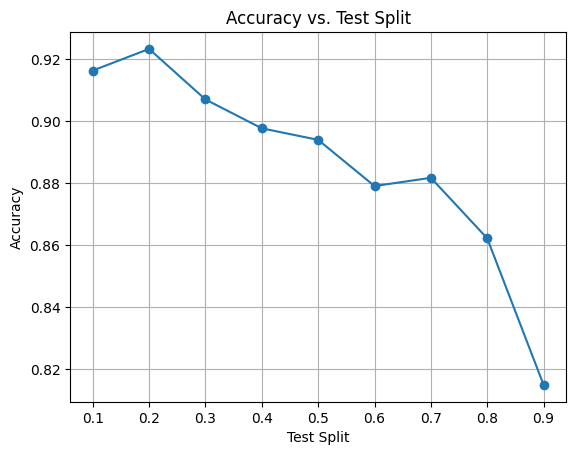

In [70]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#CatBoost Classifier

In [71]:
accuracies = []

for test_split_ratio in splits:
  X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=test_split_ratio, random_state=2)

  model = CatBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42, verbose=0)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
  print(f"Accuracy: {accuracy}")
  accuracies.append(accuracy)

  print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["CatBoost"] = [avg_accuracy]

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.9116279069767442

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        43
           1       0.98      0.94      0.96        66
           2       0.88      0.88      0.88        59
           3       0.94      0.98      0.96        47

    accuracy                           0.91       215
   macro avg       0.91      0.91      0.91       215
weighted avg       0.91      0.91      0.91       215

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84        92
           1       0.95      0.92      0.94       118
           2       0.87      0.87      0.87       113
           3       0.94      0.94      0.94       107

    accuracy                           0.90       430
   macro avg       0.90      0.90      0.90       430
weighted avg    

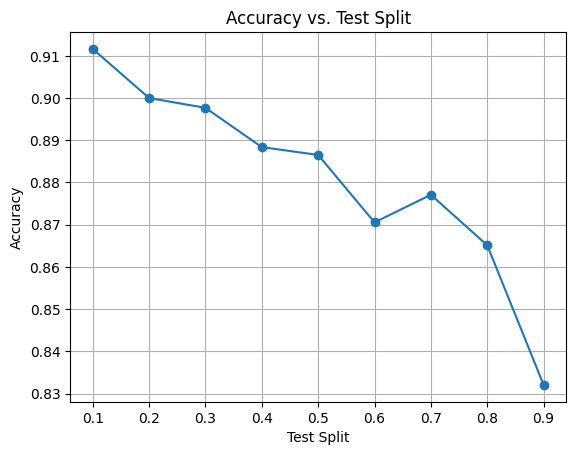

In [72]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#SVM

In [73]:
accuracies = []

for test_split_ratio in splits:
  X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=test_split_ratio, random_state=2)

  model = SVC(kernel='rbf', random_state=42)  # You can change kernel to 'rbf', 'poly', etc.
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
  print(f"Accuracy: {accuracy}")
  accuracies.append(accuracy)

  print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy = np.mean(accuracies)

model_accuracies["SVM"] = [avg_accuracy]

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.9023255813953488

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        43
           1       1.00      0.92      0.96        66
           2       0.86      0.86      0.86        59
           3       0.90      1.00      0.95        47

    accuracy                           0.90       215
   macro avg       0.90      0.90      0.90       215
weighted avg       0.90      0.90      0.90       215

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.9023255813953488

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        92
           1       0.98      0.91      0.94       118
           2       0.85      0.88      0.87       113
           3       0.91      0.98      0.95       107

    accuracy                           0.90       430
   macro avg       0.90      0.90      0.90       430
w

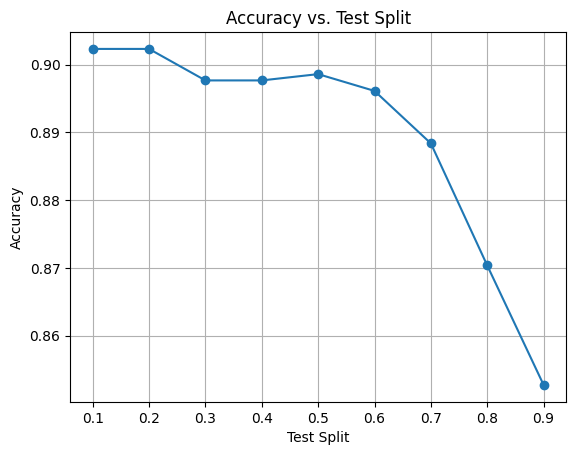

In [74]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#Feedforward Neural Network

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=2)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=64, verbose=0)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

predictions = model.predict(X_test)
predicted_classes = tf.argmax(predictions, axis=1).numpy()

avg_accuracy = accuracy
model_accuracies["Feed Forward NN"] = [avg_accuracy]

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9227 - loss: 0.5437 
Test Loss: 0.4732, Test Accuracy: 0.9279
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


#RNN


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=2)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Reshaping features data to 3D (samples, timesteps, features) for RNN
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='softmax')  # Adjust for number of classes
])

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_rnn, y_train, validation_data=(X_test_rnn, y_test), epochs=150, batch_size=64, verbose=0)

loss, accuracy = model.evaluate(X_test_rnn, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

predictions = model.predict(X_test_rnn)
predicted_classes = tf.argmax(predictions, axis=1).numpy()

avg_accuracy = accuracy
model_accuracies["RNN"] = [avg_accuracy]

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9269 - loss: 0.6478 
Test Loss: 0.6043, Test Accuracy: 0.9302
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


#All Model Performances

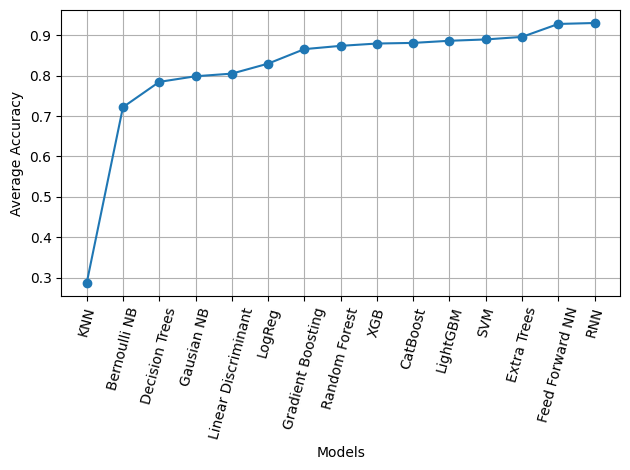

In [88]:
avg_accuracies_sorted = {k: v for k, v in sorted(model_accuracies.items(), key=lambda item: item[1])}

keys = list(avg_accuracies_sorted.keys())
values = list(avg_accuracies_sorted.values())

plt.plot(keys, values, marker='o')
plt.xlabel("Models")
plt.ylabel("Average Accuracy")
plt.xticks(rotation=75)
plt.grid()
plt.tight_layout()
plt.show()